In [1]:

import os
os.chdir('..')

In [4]:


import sys

print(os.getcwd())

from domid.tasks.task_weah import NodeTaskWEAH
from domid.arg_parser import mk_parser_main
from domid.dsets.dset_weah import DsetWEAH
import matplotlib.pyplot as plt
import torch.utils.data
%matplotlib inline

/home/mariia.sidulova/WEAH_dataset/DomId


In [3]:
sys.path.insert(0,'/home/mariia.sidulova/DomId')
sys.path.insert(0, '/home/mariia.sidulova/DomId/DomainLab')

In [5]:
#os.listdir('domid')

In [5]:
parser = mk_parser_main()
args = parser.parse_args(["--te_d", "0",
                          "--tr_d", "1", "2",
                          "--dpath",
                          "../../png_files/Training",
                          "--split", "0.8",
                          "--d_dim", "2",
                          "--bs", "1"])
node = NodeTaskWEAH()
print(node.get_list_domains())
print(node.list_str_y)
#print(node.init_business(args))

['digit0', 'digit1', 'digit2']
['dummy0', 'dummy1', 'dummy2']


In [6]:

args

Namespace(L=3, acon=None, aggtag='aggtag', aname=None, apath=None, beta_d=1.0, beta_t=1.0, beta_x=1.0, beta_y=1.0, bs=1, d_dim=2, debug=False, dim_inject_y=0, dmem=False, dpath='../../png_files/Training', epo_te=1, epochs_ctr=None, epochs_erm=None, epos=2, epos_per_match_update=5, es=10, exptag='exptag', gamma_d=None, gamma_reg=1.0, gamma_y=None, gen=False, img_h_dim=8, keep_model=False, lr=0.0001, model='linear', msel=None, nname=None, nname_argna2val=None, nname_dom=None, nname_encoder_sandwich_layer_img2h4zd=None, nname_topic_distrib_img2topic=None, nocu=False, npath=None, npath_argna2val=None, npath_dom=None, npath_encoder_sandwich_layer_img2h4zd=None, npath_topic_distrib_img2topic=None, out='zoutput', path_to_domain=None, penalty_ws=0.1, pre_tr=25, prior='Bern', seed=0, split=0.8, task=None, tau=0.05, te_d=['0'], topic_dim=3, topic_h_dim=8, tpath=None, tr_d=['1', '2'], warmup=100, zd_dim=64, zx_dim=0, zy_dim=64)

In [7]:
from torchvision import transforms

In [8]:
os.getcwd()

'/home/mariia.sidulova/WEAH_dataset/DomId'

In [9]:
#dset2 = node.get_dset_by_domain(args, 'class0')

In [10]:
path0 =[]
path1 = []
path2 = []
path3 = []
dpath = args.dpath
for folder in os.listdir(dpath):
    folder_path = os.path.join(dpath, folder)
    for file in os.listdir(folder_path):

        if file[-3:] == 'png':
            annotation = file.split('_')[2]

            if annotation == '0':
                path0.append(os.path.join(dpath, folder, file))
            if annotation == '1':
                path1.append(os.path.join(dpath, folder, file))
            if annotation == '2':
                path2.append(os.path.join(dpath, folder, file))
            if annotation == '3':
                path3.append(os.path.join(dpath, folder, file))

print(len(path1), len(path2), len(path3))
paths = [path1, path2, path3]

22500 82311 6480


In [11]:
na_domain =1
dset1 = DsetWEAH(na_domain, path = paths[na_domain], args=args, path_to_domain = None, transform=None)

In [12]:
counter=0
for d in dset1:
    counter+=1
    print(type(d))
    if counter>3:
        break
print(counter)

../../png_files/Training/BA-25-51 A/BA-25-51 B_anno_2_reg_1CAH_patchnumber_31.png
<class 'tuple'>
../../png_files/Training/BA-25-51 A/BA-25-51 A_anno_2_reg_2CAH_Aug_90_patchnumber_9.png
<class 'tuple'>
../../png_files/Training/BA-25-51 A/BA-25-51 A_anno_2_reg_2CAH_patchnumber_24.png
<class 'tuple'>
../../png_files/Training/BA-25-51 A/BA-25-51 B_anno_2_reg_3CAH_patchnumber_10.png
<class 'tuple'>
4


torch.Size([3, 256, 256])
torch.Size([256, 256, 3])


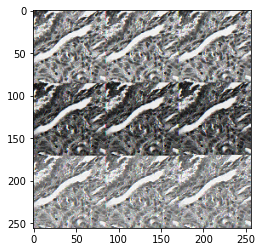

In [36]:
from torchvision.io import read_image
image = read_image('../../png_files/Training/BA-25-51 A/BA-25-51 B_anno_2_reg_1CAH_patchnumber_31.png')
#image = torch.is_tensor(image)
print(image.shape)
image = image.reshape(image.shape[1], image.shape[2], image.shape[0])
print(image.shape)
plt.imshow(image)
plt.show()

In [38]:
#print("Training portion: {} images\nTest portion: {} images".format(len(dset2[0]), len(dset2[1])))

In [39]:
import torch

../../png_files/Training/BA-25-51 A/BA-25-51 B_anno_2_reg_1CAH_patchnumber_31.png
torch.Size([1, 3, 256, 256])
../../png_files/Training/BA-25-51 A/BA-25-51 A_anno_2_reg_2CAH_Aug_90_patchnumber_9.png
torch.Size([1, 3, 256, 256])
../../png_files/Training/BA-25-51 A/BA-25-51 A_anno_2_reg_2CAH_patchnumber_24.png
torch.Size([1, 3, 256, 256])
../../png_files/Training/BA-25-51 A/BA-25-51 B_anno_2_reg_3CAH_patchnumber_10.png
torch.Size([1, 3, 256, 256])
../../png_files/Training/BA-25-51 A/BA-25-51 B_anno_2_reg_1CAH_patchnumber_34.png
torch.Size([1, 3, 256, 256])
../../png_files/Training/BA-25-51 A/BA-25-51 A_anno_2_reg_1CAH_patchnumber_33.png
torch.Size([1, 3, 256, 256])


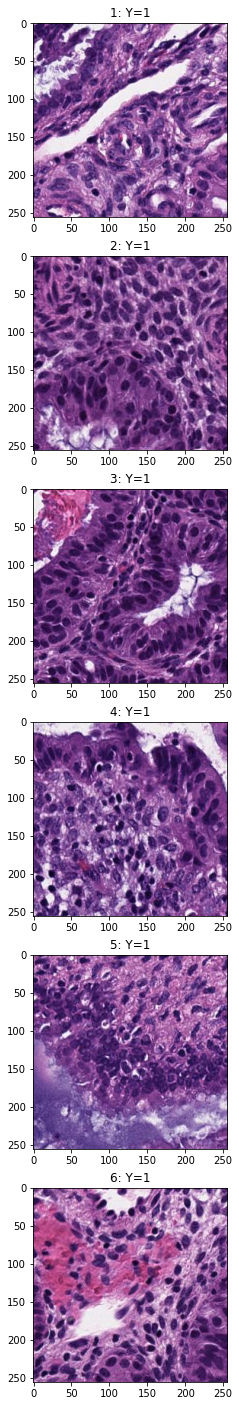

In [47]:
ldr = torch.utils.data.DataLoader(dset1)


plt.figure(figsize=(5,25))
for i, (tensor_x, vec_y, machine, img_loc, domain) in enumerate(ldr):
    print(tensor_x.shape)
    tensor_x = tensor_x[0, :, :, :]
    #print(machine, img_loc)
    plt.subplot(6, 1, i+1)
    plt.title("{}: Y={}".format(i+1, vec_y[0].numpy().argmax()))
    
    #m = torch.nn.Tanh()
    
   # mean = [0.6399, 0.5951, 0.6179]
    #mean = [tensor_x[0, 0, :, :].mean(), tensor_x[0, 1, :, :].mean(), tensor_x[0, 2, :, :].mean()]

   # m = torch.zeros(tensor_x.shape[1], tensor_x.shape[2], tensor_x.shape[3])
    #m[0, :, :] = mean[0]
    #m[1, :, :] = mean[1]
    #m[2, :, :] = mean[2]
   
 
    #norm_img = tensor_x[0] - m
    #plt.imshow(tensor_x) #.cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    plt.imshow(tensor_x.swapaxes(0, -1).swapaxes(0,1))
    
    # print('mean', norm_img.cpu().numpy().mean(),'std', norm_img.cpu().numpy().std(), 
    #       'max', norm_img.cpu().numpy().max(), 'min', norm_img.cpu().numpy().min())
    if i >= 5:
        break
#plt.show()

In [ ]:
ldr = torch.utils.data.DataLoader(dset2[0])

plt.figure(figsize=(5,25))
for i, (tensor_x, vec_y) in enumerate(ldr):
    plt.subplot(6, 1, i+1)
    plt.title("{}: Y={}".format(i+1, vec_y[0].numpy().argmax()))
    plt.imshow(tensor_x[0].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    if i >= 5:
        break

## Check the training data loader

number batches:

In [ ]:
len(node.loader_tr)

In [ ]:
plt.figure(figsize=(5,100))
for i, (tensor_x, vec_y, vec_d) in enumerate(node.loader_tr):
    plt.subplot(21, 1, i+1)
    plt.title("{}: Y={}, D={}".format(i+1, vec_y[0].numpy().argmax(), vec_d[0].numpy().argmax()))
    plt.imshow(tensor_x[0].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    if i >= 20:
        break